# Assignment 3
Some general remarks for handing in exercises:
- Each exercise comes with context and code from the exercise-set of which it is a part. It is up to you to recycle the right code. If this notebook can be executed from top to bottom on another computer (given the right libraries are installed and data stored) it makes it easier to give points for exercises that were only partially finished for whatever reason (don't worry about running the code from week 8 in the notebook -- I will run those as scrypts, but do include the code in a code a cell and the output you got on your computer in a text cell.
- Make sure to answer each sub-exercise
- Commenting amply on your results makes it easier to understand that you were on the right track, even if the answer was wrong

### Week 7

In [1]:
import re
import nltk

def get_clean_text(title, folder):
    """Given a character name (title) and the faction it belongs to
    return the page markup as a neatly cleaned string.
    
    Input
    -----
        title : str
        folder : str
    
    Output
    ------
        text : str
        
    Example
    -------
        >>> get_clean_text('Iron Man', 'heroes')
    """
    # Load markup
    with open(f"./{folder}/{title}.txt") as fp:
        text = fp.read()

    # Remove category links
    text = re.sub(r'\[\[Category.+\]\]', '', text)
    
    # Fix links (match and clear "[[Iron Man (comic book)|" and "[[", then on next line "]]"
    text = re.sub(r'(\[\[((?!\]\]).)+\|)|(\[\[)', '', text)
    text = re.sub(r'\]\]', '', text)
    
    # Remove '''
    text = re.sub(r"'''", '', text)
    
    # Remove refs
    text = re.sub(r'<ref.+?</ref>', '', text)
    
    # Remove other ugly html links
    text = re.sub(r'<.+?>', '', text)
    
    # Remove '=' signs in headers
    text = re.sub(r'=+', '', text)
    
    # Remove table and external links
    text = re.sub(r'\{\{[\w\W]*?\}\}', '', text)
    
    # Remove everything after "See Also"
    text = re.sub(r'== ?See [aA]lso[\w\W]+', "", text)

    return text

>**Ex. 7.2.1**: Compute and visualize sentiment scores.
* Using the `VADER` algorithm supported in `nltk` (i.e. `from nltk.sentiment.vader import SentimentIntensityAnalyzer`), you can obtain three scores for a piece of text: it's inferred negativity, neutrality and positivity.
* Use `SentimentIntensityAnalyzer` to get these three scores for each character. Then, for each faction, make three distribution plots (e.g. histograms), that each show how negativity, neutrality and positivity are distributed, respectively. That's 9 plots in total.
* In each of these plots, report the mean of the distribution.
* Comment on your result. Does writing in Wikipedia seem biased to you?

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas
import os

heroSentiment = []
villainSentiment = []
ambigSentiment = []
sid = SentimentIntensityAnalyzer()

#Get sentiment scores and add them to list
for characters in os.listdir("./superheroes"):
    heroSentiment.append(sid.polarity_scores(get_clean_text(characters[:-4], 'superheroes')))
    print(f"Finishing {characters}")
for characters in os.listdir("./supervillans"):
    villainSentiment.append(sid.polarity_scores(get_clean_text(characters[:-4], 'supervillans')))
    print(f"Finishing {characters}")
for characters in os.listdir("./ambiguous"):
    ambigSentiment.append(sid.polarity_scores(get_clean_text(characters[:-4], 'ambiguous')))
    print(f"Finishing {characters}")



Finishing Wallflower (comics).txt
Finishing Caiman (comics).txt
Finishing Kevin Sydney.txt
Finishing Gabriel the Devil Hunter.txt
Finishing Grace (Marvel Comics).txt
Finishing Weapon H.txt
Finishing Shaman (comics).txt
Finishing Spider-Man (Pavitr Prabhakar).txt
Finishing Turbo (comics).txt
Finishing Catsai.txt
Finishing Ulysses Bloodstone.txt
Finishing Spider-Woman (Jessica Drew).txt
Finishing Tonaja.txt
Finishing Spider-Woman (Gwen Stacy).txt
Finishing Ian Rogers (character).txt
Finishing Prime (comics).txt
Finishing Minotaur (New-Gen).txt
Finishing Darkhawk.txt
Finishing Gabriel (New-Gen).txt
Finishing Jean Grey.txt
Finishing Leech (character).txt
Finishing Karnak (comics).txt
Finishing Ms. Marvel.txt
Finishing Flex (character).txt
Finishing Vance Astrovik.txt
Finishing Inhumans.txt
Finishing Blazing Skull.txt
Finishing Captain Marvel (Khn'nr).txt
Finishing Star Brand.txt
Finishing Cammi (character).txt
Finishing Moonglow (comics).txt
Finishing Hornet (comics).txt
Finishing Steel Sp

Finishing Hit-Monkey.txt
Finishing Captain Planet and the Planeteers.txt
Finishing Shatterstar.txt
Finishing Cyclops (Marvel Comics).txt
Finishing Whizzer (Robert Frank).txt
Finishing Breeze Barton.txt
Finishing Snapdragon (Morituri).txt
Finishing Scarlet Witch.txt
Finishing Thea (New-Gen).txt
Finishing San (comics).txt
Finishing Darwin (character).txt
Finishing Digitek (character).txt
Finishing Silver (comics).txt
Finishing Speed (character).txt
Finishing Sabra (character).txt
Finishing Gwenpool.txt
Finishing Stingray (comics).txt
Finishing Shamrock (comics).txt
Finishing Rage (comics).txt
Finishing Kiwi Black.txt
Finishing Anya Corazon.txt
Finishing Shroud (comics).txt
Finishing Rockslide (character).txt
Finishing Killraven.txt
Finishing Wraith (Yuri Watanabe).txt
Finishing Man-Thing.txt
Finishing Hindsight (character).txt
Finishing John Jameson (character).txt
Finishing Rick Jones (character).txt
Finishing Franklin Richards (character).txt
Finishing Ganymede (comics).txt
Finishing F

Finishing Kingmaker (comics).txt
Finishing Mike Asher.txt
Finishing Blastaar.txt
Finishing Trick Shot (character).txt
Finishing Dragon Man (character).txt
Finishing Wrecker (comics).txt
Finishing Desak.txt
Finishing Poundcakes (Marvel Comics).txt
Finishing Black Mariah (comics).txt
Finishing Jack O'Lantern (Marvel Comics).txt
Finishing Category:Lists of Marvel Comics supervillains.txt
Finishing Gentleman (character).txt
Finishing Proctor (comics).txt
Finishing Masked Marauder.txt
Finishing Black Widow (Yelena Belova).txt
Finishing Glowworm (comics).txt
Finishing Occulus.txt
Finishing Mahkizmo.txt
Finishing Aguja (Marvel Comics).txt
Finishing Death-Shield.txt
Finishing Cyber (Marvel Comics).txt
Finishing Ebon Seeker.txt
Finishing Mendel Stromm.txt
Finishing Ebony Maw.txt
Finishing Jink Slater.txt
Finishing Matsu'o Tsurayaba.txt
Finishing Master Menace.txt
Finishing Super Sabre (comics).txt
Finishing Zarrko.txt
Finishing Zzzax.txt
Finishing Midnight Sun (Marvel Comics).txt
Finishing Hala

Finishing Seth (Neo).txt
Finishing Bulldozer (character).txt
Finishing Steeplejack (Marvel Comics).txt
Finishing Morg.txt
Finishing Damage (Marvel Comics).txt
Finishing Foreigner (character).txt
Finishing Vavavoom.txt
Finishing Midas (comics).txt
Finishing Cheshire Cat (comics).txt
Finishing Prester John (comics).txt
Finishing List of Iron Man enemies.txt
Finishing Tempus (comics).txt
Finishing Genesis (Marvel Comics).txt
Finishing Master Man (Marvel Comics).txt
Finishing Category:Marvel Comics female supervillains.txt
Finishing Jillian (comics).txt
Finishing Gamesmaster (comics).txt
Finishing Mister Jip.txt
Finishing J'son (character).txt
Finishing Walking Stiletto.txt
Finishing Goblin King.txt
Finishing Galactus.txt
Finishing U-Man.txt
Finishing Rose (Marvel Comics).txt
Finishing Enforcer (comics).txt
Finishing Ymir (Marvel Comics).txt
Finishing Silver Dagger (comics).txt
Finishing Princess Python.txt
Finishing Egghead (Marvel Comics).txt
Finishing Gemini (Marvel Comics).txt
Finishin

Finishing Kraven the Hunter.txt
Finishing Zarek (comics).txt
Finishing Avalanche (character).txt
Finishing Russian (comics).txt
Finishing Foolkiller.txt
Finishing Fuego (comics).txt
Finishing Gazer.txt
Finishing Hive (character).txt
Finishing Sagittarius (comics).txt
Finishing Hypno-Hustler.txt
Finishing Achilles (Pantheon).txt
Finishing Johnny Dee.txt
Finishing Zheng Zu.txt
Finishing Dredmund the Druid.txt
Finishing Brain Drain (character).txt
Finishing Abyss (comics).txt
Finishing Impossible Man.txt
Finishing Doctor Druid.txt
Finishing Guardsman (character).txt
Finishing Kristoff Vernard.txt
Finishing Mania (character).txt
Finishing Tarantula (Marvel Comics).txt
Finishing Vulcan (Marvel Comics).txt
Finishing Noh-Varr.txt
Finishing Hiro-Kala.txt
Finishing Quicksilver (Marvel Comics).txt
Finishing Blue Eagle (character).txt
Finishing Living Brain.txt
Finishing Erik Josten.txt
Finishing Ape-X.txt
Finishing Hellfire (J. T. Slade).txt
Finishing Humbug (character).txt
Finishing Detroit Ste

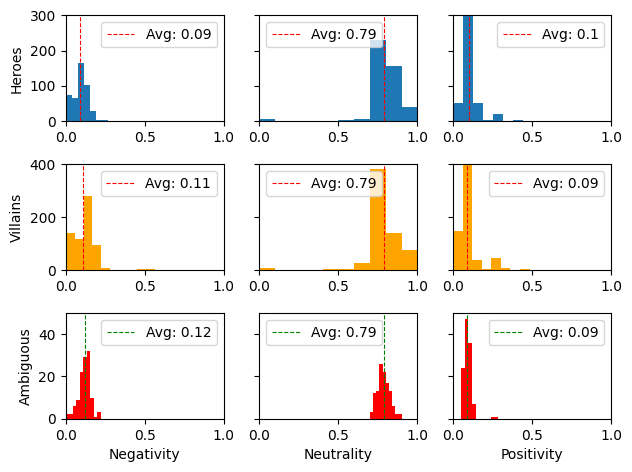

In [8]:
from matplotlib import pyplot as plt
heroDF = pandas.DataFrame(heroSentiment)
villainDF = pandas.DataFrame(villainSentiment)
ambigDF = pandas.DataFrame(ambigSentiment)


#Plot sentimeent for all 3 states for all 3 classes
hero_neg = heroDF.neg
plt.subplot(3,3,1)
plt.hist(hero_neg)
plt.ylabel("Heroes")
plt.xlim(0, 1)
plt.ylim(0, 300)
#mean
mean = round(hero_neg.mean(), 2)
plt.axvline(x=mean, color='r', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


hero_neu = heroDF.neu
plt.subplot(3,3,2)
plt.hist(hero_neu)
plt.xlim(0, 1)
plt.gca().set_yticklabels([])
plt.ylim(0, 300)
#mean
mean = round(hero_neu.mean(), 2)
plt.axvline(x=mean, color='r', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


hero_pos = heroDF.pos
plt.subplot(3,3,3)
plt.hist(hero_pos)
plt.xlim(0, 1)
plt.gca().set_yticklabels([])
plt.ylim(0, 300)
#mean
mean = round(hero_pos.mean(), 2)
plt.axvline(x=mean, color='r', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


villain_neg = villainDF.neg
plt.subplot(3,3,4)
plt.hist(villain_neg, color='orange')
plt.ylabel("Villains")
plt.xlim(0, 1)
plt.ylim(0, 400)
#mean
mean = round(villain_neg.mean(), 2)
plt.axvline(x=mean, color='r', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()

villain_neu = villainDF.neu
plt.subplot(3,3,5)
plt.hist(villain_neu, color='orange')
plt.xlim(0, 1)
plt.gca().set_yticklabels([])
plt.ylim(0, 400)
#mean
mean = round(villain_neu.mean(), 2)
plt.axvline(x=mean, color='r', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


villain_pos = villainDF.pos
plt.subplot(3,3,6)
plt.hist(villain_pos, color='orange')
plt.xlim(0, 1)
plt.gca().set_yticklabels([])
plt.ylim(0, 400)
#mean
mean = round(villain_pos.mean(), 2)
plt.axvline(x=mean, color='r', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


ambig_neg = ambigDF.neg
plt.subplot(3,3,7)
plt.hist(ambig_neg, color='red')
plt.xlabel("Negativity")
plt.ylabel("Ambiguous")
plt.xlim(0, 1)
plt.ylim(0, 50)
#mean
mean = round(ambig_neg.mean(), 2)
plt.axvline(x=mean, color='g', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


ambig_neu = ambigDF.neu
plt.subplot(3,3,8)
plt.hist(ambig_neu, color='red')
plt.xlabel("Neutrality")
plt.xlim(0, 1)
plt.gca().set_yticklabels([])
plt.ylim(0, 50)
#mean
mean = round(ambig_neu.mean(), 2)
plt.axvline(x=mean, color='g', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()


ambig_pos = ambigDF.pos
plt.subplot(3,3,9)
plt.hist(ambig_pos, color='red')
plt.xlabel("Positivity")
plt.gca().set_yticklabels([])
plt.xlim(0, 1)
plt.ylim(0, 50)
#mean
mean = round(ambig_pos.mean(), 2)
plt.axvline(x=mean, color='g', linestyle='--', linewidth=0.8, label=f'Avg: {mean}')
plt.legend()

plt.tight_layout(pad=1)



The writers on wikipedia try their best to be neutral as we can see averages for the neutrality all being around 0.79. There is always gonna be so bias which is why we can see a little bit of positive and negative sentiment for all characters regardless of class, but since it is mostly informational, the vast majority of the text tries to be neutral and present facts.

>**Ex. 7.3.1**: Create a bag of words matrix that contains all your characters. Maintain also a target array, so you know whether a row corresponds to a hero, a villain or an ambiguous character. Also, **do not include words that only appear for one character**.
1. How many different words are in your vocabulary/columns are in your matrix?
2. Print the 10 most used words, and the 10 least used words, along with their usage count.
3. Plot the distribution of how many times words are used. *Scale it appropriately*. What does this distribution look like?
>
>*Hint: Since you already extracted lists of words for each faction in Ex. 7.1.1, you can use these to figure out what the total vocabulary of words used in your dataset is. You can "clean up" this vocabulary by a number of tricks. For example, there are tools for *stemming* words to remove grammar so that e.g. 'cat' and 'cats' both become 'cat', but that's all up to you whether you want to go that deep.*

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Get list of stopwords and add a few
stop_words = set(stopwords.words('english'))

def get_clean_words(text, exclude_words=[]):
    """Given some text, return a list of clean words.
    
    Input
    -----
        text : str
        exclude_words : list
            Words to exclude (e.g. characters own name)
    
    Output
    ------
        words : list
        
    Example
    -------
        >>> my_text = get_clean_text('Iron Man', 'heroes')
        >>> my_words = get_clean_words(my_text, exclude_words=['Iron', 'Man'])
    """

    # Extarct words
    words = word_tokenize(text)
    
    # Add exclude words to words to give it same treatment
    words += exclude_words
    
    # Convert to lower case
    words = [w.lower() for w in words]
    
    # Clear punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]
    
    # Seperate words and exclude words
    if len(exclude_words) > 0:
        exclude_words = words[-len(exclude_words):]
        words = words[:-len(exclude_words)]
    
    # Remove non-alphabetic words
    words = [w for w in words if w.isalpha()]
    
    # Remove stop words
    words = [w for w in words if not w in stop_words | set(exclude_words)]
    
    # Remove single letter words 
    words = [w for w in words if len(w) > 1]

    return words

In [5]:
#Create bag of words
import os
import warnings
warnings.filterwarnings("ignore")

BOW = pandas.DataFrame()
wordsDict = {}

#Save the amount of each word in a dictionary
for characters in os.listdir("./superheroes"):
    wordsDict = wordsDict.fromkeys(wordsDict, 0)
    wordsList = (get_clean_words(get_clean_text(characters[:-4], 'superheroes'))) #get list of words from cleaned text
    for word in wordsList:
        if word in wordsDict:
            wordsDict[word] += 1 #increment if already in dict
        else:
            wordsDict[word] = 1 #add to dict if not in dict
    wordsDict['target'] = 0
    BOW[characters] = wordsDict

#Repeat for supervillains
for characters in os.listdir("./supervillans"):
    wordsDict = wordsDict.fromkeys(wordsDict, 0)
    wordsList = (get_clean_words(get_clean_text(characters[:-4], 'supervillans')))
    for word in wordsList:
        if word in wordsDict:
            wordsDict[word] += 1
        else:
            wordsDict[word] = 1
    wordsDict['target'] = 1
    BOW[characters] = wordsDict

#Repeat for ambig
for characters in os.listdir("./ambiguous"):
    wordsDict = wordsDict.fromkeys(wordsDict, 0)
    wordsList = (get_clean_words(get_clean_text(characters[:-4], 'ambiguous')))
    for word in wordsList:
        if word in wordsDict:
            wordsDict[word] += 1
        else:
            wordsDict[word] = 1
    wordsDict['target'] = 2
    BOW[characters] = wordsDict
    
BOW = BOW.transpose()
BOW.head(1000)


,alliances,aliases,powers,pheromone,manipulation,wallflower,laurie,collins,fictional,character,...,think,type,references,external,links,http,uncannyxmennetcharacterswallflower,uncannyxmennet,profile,target
Wallflower (comics).txt,1,1,12,2,1,6,29,1,2,3,...,1,1,1,1,1,1,1,1,1,0
Caiman (comics).txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kevin Sydney.txt,0,0,5,0,0,0,0,0,2,22,...,0,0,1,1,1,3,0,1,2,0
Gabriel the Devil Hunter.txt,0,0,2,0,0,0,0,0,2,6,...,0,0,1,1,1,1,0,0,0,0
Grace (Marvel Comics).txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ultimo (Marvel Comics).txt,0,0,2,0,0,0,0,0,1,2,...,0,0,1,1,1,0,0,0,0,1
Nightmare (Marvel Comics).txt,0,0,5,0,0,0,0,0,2,2,...,0,0,1,1,1,1,0,0,0,1
Category:Marvel Comics Nazis.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Mysteria (comics).txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


1. There are 405 columns (words) in the Bag of Words Matrix

In [6]:
2.
# calculate the sum of each column to get the total amount for each word
sums = BOW.sum(axis=0)

# sort the resulting series in descending order
# take the top 10 rows of the sorted series
sortedSums = sums.sort_values(ascending=False)
most_10 = sortedSums.head(10)


# sort the resulting series in descending order
# take the top 10 rows of the sorted series
sortedSums = sums.sort_values(ascending=True)
least_10 = sortedSums.head(10)

print(f"Top 10 most used:\n{most_10}\n")
print(f"Top 10 least used:\n{least_10}")

Top 10 most used:
marvel       9810
character    5658
new          5580
later        5396
powers       4260
also         4232
one          4065
first        4003
xmen         3714
time         3280
dtype: int64

Top 10 least used:
uncannyxmennetcharacterswallflower    1
despicable                            1
headoverheels                         1
fistfight                             1
hability                              1
healthier                             2
foley                                 2
withering                             2
calmness                              2
grrrl                                 2
dtype: int64


In [1]:
#3. Graphing the distribution
fig, ax = plt.subplots()
plt.bar(sums.index, sums.values)
plt.xlabel("Word")
plt.xlabel("Appearances")
plt.xticks([])
fig.set_size_inches(10, 6) 
plt.show()

NameError: name 'plt' is not defined

Since there are so many words, we can't list them all on the x-axis, however we can tell the top 10 and least 10 from the work we did before to correlate some of the spikes in the graph. In terms of distribution, we can see that their is a larger spike of words in the beginning of the graph. This is because of how the BOW was made, as the words were put into the DF on order of appearance, meaning that since a lot of the most used words would appear in the first few character's text as well it will be in the beginning of the dataframe. Overall, a decent chunk of words appear about 2000 times, with a few extending beyond that, and the majority sinking below that.

### Week 8

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

In [ ]:
from mrjob.job import MRJob

class MRWordCounter(MRJob):

    def mapper(self, _, line):
        yield "chars", len(line)
        yield "words", len(line.split())
        yield "lines", 1

    def reducer(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    MRWordCounter.run()

    "words" 21
    "lines" 4
    "chars" 88

>**Ex. 8.2.3**: Lets go a bit deeper. In this exercise you will implement a MapReduce-MapReduce operation, which computes the same thing as we computed above, but takes as input friend-network data in a slightly more common format: 

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>Each line is a "friend-link". The links are undirected and each only occurs once.

>Your job now, is to produce the same output as you did in Ex. 8.2.2, using this input data. To get started faster, use the template below, which shows how to chain together multiple MapReduce steps. Fill out the template and show the output that you get from the terminal when you run it. Clarify whether it corresponds with the output from Ex. 8.2.2.

>*Hint: Try to write the first MapReduce step such that it outputs key-value pairs that correspond to the input data format from Ex. 8.2.2. Then you can reuse your solution to Ex. 8.2.2 in your second MapReduce step.*

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class CommonFriends(MRJob):

    def mapper1(self, _, line):
        # Split the line into two friends
        friends = line.strip().split()
        # Emit each friend and their list of friends as key-value pairs
        yield friends[0], friends[1]
        yield friends[1], friends[0]

    def reducer1(self, key, values):
         #yield friend with list of all friends
         yield key, list(values)

    def mapper2(self, key, values):
        # Emit each pair of friends and their common friends as key-value pairs
        for friend in list(values) :
            slist = sorted([key, friend])
            yield "{}, {}".format(slist[0], slist[1]), list(values)

    def reducer2(self, key, values):
        # Collect the list of common friends for the given key
        common_friends_list = list(values)
        # Emit the final output with the pair of friends and their common friends
        yield key, list(set(common_friends_list[0]).intersection(set(common_friends_list[1])))

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            )
        ]

if __name__ == '__main__':
    CommonFriends.run()

    "B, E"  ["D", "C"]
    "A, D"  ["C", "B"]
    "B, C"  ["A", "D", "E"]
    "B, D"  ["A", "C", "E"]
    "D, E"  ["C", "B"]
    "A, C"  ["D", "B"]
    "C, D"  ["A", "B", "E"]
    "C, E"  ["D", "B"]
    "A, B"  ["D", "C"]

>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals the proportion of small closed loops in a network, is computed as the number of realized triangles divided by the number of possible triangles.*

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class CommonFriends(MRJob):

    # First MapReduce step
    def mapper1(self, _, line):
        # Split the line into two nodes
        nodes = line.split()
        # Emit key-value pairs for both nodes
        yield nodes[0], nodes[1]
        yield nodes[1], nodes[0]

    def reducer1(self, key, values):
        # Collect all the friends of this node
        friends = set()
        for v in values:
            friends.add(v)
        # emit all possible pairs of friends
        for f1 in friends:
            for f2 in friends:
                if f1 < f2:
                    # Emit the pair of friends as the key, and the common node as the value
                    yield (f1, f2), key

    # Second MapReduce step
    def mapper2(self, key, values):
        # semit the pair of friends as the key, and the count of common nodes as the value
        yield key, len(set(values))

    def reducer2(self, key, values):
        # emit the total number of triangles
        yield "Triangles", sum(values) / 3

    # Define the sequence of Map Reduce steps
    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            )
        ]

if __name__ == '__main__':
    CommonFriends.run()


This is the final number of triangles for Facebook: 1612010                        
This is the final number of triangles for California road network: 120676